<a href="https://colab.research.google.com/github/lucaskrlima/bootcamp_soulcode_da/blob/main/EDA_NofxBar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análise exploratória de Dados

In [1]:
# importando as principais bibliotecas para o analista de dados
import pandas as pd
import numpy as np
import scipy as sp
from statistics import *
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
# Link para baixar chave de acesso e guardar em arquivos no colab
# é necessário subir a chave no diretório de arquivos do colab
'https://storage.googleapis.com/chave_acesso/week-392210-b2b4c57f8027.json'

In [23]:
# instalando biblioteca google cloud
!pip install gcsfs

In [24]:
# importando chave json
from google.cloud import storage
import os
import sys
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/content/week-392210-b2b4c57f8027.json"

In [25]:
# carrendando arquivo em um dataframe
df = pd.read_csv('gs://nofx/df_bruto/xpto.csv')
display(df)

,data,qtde,faturamento,cv,margem,margem_ac,lucro,area,pessoas,temperatura
0,01/05/2023,50,500,210,290,290,-2710,Mesa,12,29
1,02/05/2023,40,400,168,232,522,-2478,Balcão,10,23
2,03/05/2023,60,600,252,348,870,-2130,Externa,15,33
3,04/05/2023,20,200,84,116,986,-2014,Balcão,5,17
4,05/05/2023,30,300,126,174,1160,-1840,Balcão,8,20
5,06/05/2023,30,300,126,174,1334,-1666,Mesa,5,18
6,07/05/2023,30,300,126,174,1508,-1492,Balcão,5,18
7,08/05/2023,20,200,84,116,1624,-1376,Balcão,6,33
8,09/05/2023,40,400,168,232,1856,-1144,Balcão,8,23
9,10/05/2023,30,300,126,174,2030,-970,Mesa,2,19


In [26]:
# lendo a primeira linha do cabeçalho do df
df.head(1)

,data,qtde,faturamento,cv,margem,margem_ac,lucro,area,pessoas,temperatura
0,01/05/2023,50,500,210,290,290,-2710,Mesa,12,29


In [27]:
# listando informações gerais do df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   data         31 non-null     object
 1   qtde         31 non-null     int64 
 2   faturamento  31 non-null     int64 
 3   cv           31 non-null     int64 
 4   margem       31 non-null     int64 
 5   margem_ac    31 non-null     int64 
 6   lucro        31 non-null     int64 
 7   area         31 non-null     object
 8   pessoas      31 non-null     int64 
 9   temperatura  31 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.5+ KB


In [28]:
# Exibindo medidas descritivas básicas
medidas = df.describe()
display(medidas)

,qtde,faturamento,cv,margem,margem_ac,lucro,pessoas,temperatura
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,38.709677,387.096774,162.580645,224.516129,3487.483871,487.483871,9.903226,23.645161
std,11.759233,117.592334,49.388780,68.203554,2014.626580,2014.626580,4.284506,5.003655
min,20.000000,200.000000,84.000000,116.000000,290.000000,-2710.000000,2.000000,15.000000
25%,30.000000,300.000000,126.000000,174.000000,1740.000000,-1260.000000,6.500000,20.000000
50%,40.000000,400.000000,168.000000,232.000000,3364.000000,364.000000,10.000000,23.000000
75%,50.000000,500.000000,210.000000,290.000000,5017.000000,2017.000000,12.500000,27.500000
max,60.000000,600.000000,252.000000,348.000000,6960.000000,3960.000000,19.000000,33.000000


In [29]:
# Acessando os valores numéricos do atributo qtde no df original
qtde = df['qtde']
print(type(qtde))

<class 'pandas.core.series.Series'>


In [30]:
display(qtde)

0     50
1     40
2     60
3     20
4     30
5     30
6     30
7     20
8     40
9     30
10    20
11    60
12    50
13    40
14    30
15    30
16    40
17    50
18    40
19    40
20    30
21    20
22    40
23    50
24    50
25    50
26    60
27    40
28    30
29    40
30    40
Name: qtde, dtype: int64

In [31]:
# definindo qtde como uma lista
qtde = list(qtde)
print(qtde)

[50, 40, 60, 20, 30, 30, 30, 20, 40, 30, 20, 60, 50, 40, 30, 30, 40, 50, 40, 40, 30, 20, 40, 50, 50, 50, 60, 40, 30, 40, 40]


In [32]:
from statistics import *

In [33]:
# Calculando a moda de uma lista de números
mode([1,2,3,4,5,6,7,8,8,8,9,9,9,10])

8

In [34]:
# Calculando as modas de uma lista de números
multimode([1,2,3,4,5,6,7,8,8,8,9,9,9,10])

[8, 9]

In [35]:
# Calculando a moda do atributo qtde
mdo = mode(qtde)
print(mdo)

40


In [36]:
# Cria uma lista com o cabeçalho de um dataframe
labels = list(medidas.columns)
print(labels)
print(type(labels))

['qtde', 'faturamento', 'cv', 'margem', 'margem_ac', 'lucro', 'pessoas', 'temperatura']
<class 'list'>


In [37]:
moda = [] # cria uma lista vazia chamada moda
for i, v in enumerate(labels): # cria um for para percorrer i, e v da lista labels
  moda.append(mode(df[v])) # appendar na lista moda cada moda do dataframe original
print(moda) # mostrar a lista moda

[40, 400, 168, 232, 290, -2710, 5, 23]


In [38]:
medidas = medidas.reset_index() # criando um índice numérico e automaticamente fazendo com que o índice anterior vire uma coluna com os nomes das medidas
display(medidas) # mostrando

,index,qtde,faturamento,cv,margem,margem_ac,lucro,pessoas,temperatura
0,count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
1,mean,38.709677,387.096774,162.580645,224.516129,3487.483871,487.483871,9.903226,23.645161
2,std,11.759233,117.592334,49.388780,68.203554,2014.626580,2014.626580,4.284506,5.003655
3,min,20.000000,200.000000,84.000000,116.000000,290.000000,-2710.000000,2.000000,15.000000
4,25%,30.000000,300.000000,126.000000,174.000000,1740.000000,-1260.000000,6.500000,20.000000
5,50%,40.000000,400.000000,168.000000,232.000000,3364.000000,364.000000,10.000000,23.000000
6,75%,50.000000,500.000000,210.000000,290.000000,5017.000000,2017.000000,12.500000,27.500000
7,max,60.000000,600.000000,252.000000,348.000000,6960.000000,3960.000000,19.000000,33.000000


In [39]:
moda # vizualizando a lista moda

[40, 400, 168, 232, 290, -2710, 5, 23]

In [40]:
moda.insert(0, 'moda') # inserindo a palavra moda na lista moda para que ela tenha o mesmo tamanho das colunas do df medidas
print(moda)

['moda', 40, 400, 168, 232, 290, -2710, 5, 23]


In [41]:
medidas.loc[8] = moda # inserindo a lista moda no df medidas
display(medidas) # mostrando

,index,qtde,faturamento,cv,margem,margem_ac,lucro,pessoas,temperatura
0,count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
1,mean,38.709677,387.096774,162.580645,224.516129,3487.483871,487.483871,9.903226,23.645161
2,std,11.759233,117.592334,49.388780,68.203554,2014.626580,2014.626580,4.284506,5.003655
3,min,20.000000,200.000000,84.000000,116.000000,290.000000,-2710.000000,2.000000,15.000000
4,25%,30.000000,300.000000,126.000000,174.000000,1740.000000,-1260.000000,6.500000,20.000000
5,50%,40.000000,400.000000,168.000000,232.000000,3364.000000,364.000000,10.000000,23.000000
6,75%,50.000000,500.000000,210.000000,290.000000,5017.000000,2017.000000,12.500000,27.500000
7,max,60.000000,600.000000,252.000000,348.000000,6960.000000,3960.000000,19.000000,33.000000
8,moda,40.000000,400.000000,168.000000,232.000000,290.000000,-2710.000000,5.000000,23.000000


In [42]:
dev = medidas.loc[2] # isolando a linha 2 do df medidas
print(dev) # mostrar

index                 std
qtde            11.759233
faturamento    117.592334
cv               49.38878
margem          68.203554
margem_ac      2014.62658
lucro          2014.62658
pessoas          4.284506
temperatura      5.003655
Name: 2, dtype: object


In [43]:
sd = list(medidas.loc[2]) # transformando o df sd em uma lista sd
print(sd) # mostrando

['std', 11.759233388808692, 117.59233388808691, 49.388780232996496, 68.20355365509042, 2014.6265803032868, 2014.6265803032868, 4.284505717969323, 5.003654578384178]


In [44]:
sd.pop(0) # removendo std da lista sd

'std'

In [45]:
sd # conferindo se ficou joinha

[11.759233388808692,
 117.59233388808691,
 49.388780232996496,
 68.20355365509042,
 2014.6265803032868,
 2014.6265803032868,
 4.284505717969323,
 5.003654578384178]

In [46]:
var = [] # criando a lista vazia var
for i in range(len(sd)): # percorrendo a lista sd usando len como iteração
  var.append(round((sd[i]**2),2)) # appendando cada valor de sd ao quadrado na lista var
var.insert(0,'variância') # inserindo a string 'Variancia' na lista var
print(var)

['variância', 138.28, 13827.96, 2439.25, 4651.72, 4058720.26, 4058720.26, 18.36, 25.04]


In [47]:
medidas.loc[9] = var # inserindo a lista var no df medidas
display(medidas) # mostrando

,index,qtde,faturamento,cv,margem,margem_ac,lucro,pessoas,temperatura
0,count,31.000000,31.000000,31.000000,31.000000,3.100000e+01,3.100000e+01,31.000000,31.000000
1,mean,38.709677,387.096774,162.580645,224.516129,3.487484e+03,4.874839e+02,9.903226,23.645161
2,std,11.759233,117.592334,49.388780,68.203554,2.014627e+03,2.014627e+03,4.284506,5.003655
3,min,20.000000,200.000000,84.000000,116.000000,2.900000e+02,-2.710000e+03,2.000000,15.000000
4,25%,30.000000,300.000000,126.000000,174.000000,1.740000e+03,-1.260000e+03,6.500000,20.000000
5,50%,40.000000,400.000000,168.000000,232.000000,3.364000e+03,3.640000e+02,10.000000,23.000000
6,75%,50.000000,500.000000,210.000000,290.000000,5.017000e+03,2.017000e+03,12.500000,27.500000
7,max,60.000000,600.000000,252.000000,348.000000,6.960000e+03,3.960000e+03,19.000000,33.000000
8,moda,40.000000,400.000000,168.000000,232.000000,2.900000e+02,-2.710000e+03,5.000000,23.000000
9,variância,138.280000,13827.960000,2439.250000,4651.720000,4.058720e+06,4.058720e+06,18.360000,25.040000


In [48]:
# atribuindo novas medidas descritivas ao describe
sd = list(medidas.iloc[2])
sd.pop(0)
q1 = list(medidas.iloc[4])
q1.pop(0)
q3 = list(medidas.iloc[6])
q3.pop(0)
min = list(medidas.iloc[3])
min.pop(0)
max = list(medidas.iloc[7])
max.pop(0)
var = []
at = []
aiq = []
ls = []
li = []
for i in range(len(sd)):
  var.append(sd[i]**2)
  at.append(max[i]-min[i])
  aiq.append(q3[i]-q1[i])
  ls.append(q3[i]+(1.5*aiq[i]))
  li.append(q1[i]-(1.5*aiq[i]))
var.insert(0, 'variância')
at.insert(0, 'AT')
aiq.insert(0, 'AIQ')
ls.insert(0, 'LS')
li.insert(0, 'LI')
medidas.loc[9] = var
medidas.loc[10] = at
medidas.loc[11] = aiq
medidas.loc[12] = ls
medidas.loc[13] = li
display(medidas)

,index,qtde,faturamento,cv,margem,margem_ac,lucro,pessoas,temperatura
0,count,31.000000,31.000000,31.000000,31.000000,3.100000e+01,3.100000e+01,31.000000,31.000000
1,mean,38.709677,387.096774,162.580645,224.516129,3.487484e+03,4.874839e+02,9.903226,23.645161
2,std,11.759233,117.592334,49.388780,68.203554,2.014627e+03,2.014627e+03,4.284506,5.003655
3,min,20.000000,200.000000,84.000000,116.000000,2.900000e+02,-2.710000e+03,2.000000,15.000000
4,25%,30.000000,300.000000,126.000000,174.000000,1.740000e+03,-1.260000e+03,6.500000,20.000000
5,50%,40.000000,400.000000,168.000000,232.000000,3.364000e+03,3.640000e+02,10.000000,23.000000
6,75%,50.000000,500.000000,210.000000,290.000000,5.017000e+03,2.017000e+03,12.500000,27.500000
7,max,60.000000,600.000000,252.000000,348.000000,6.960000e+03,3.960000e+03,19.000000,33.000000
8,moda,40.000000,400.000000,168.000000,232.000000,2.900000e+02,-2.710000e+03,5.000000,23.000000
9,variância,138.279570,13827.956989,2439.251613,4651.724731,4.058720e+06,4.058720e+06,18.356989,25.036559


In [49]:
# função que cria um describe completo a partir de medidas básicas
def eda(medidas):
  sd = list(medidas.iloc[2])
  sd.pop(0)
  q1 = list(medidas.iloc[4])
  q1.pop(0)
  q3 = list(medidas.iloc[6])
  q3.pop(0)
  min = list(medidas.iloc[3])
  min.pop(0)
  max = list(medidas.iloc[7])
  max.pop(0)
  var = []
  at = []
  aiq = []
  ls = []
  li = []
  for i in range(len(sd)):
    var.append(sd[i]**2)
    at.append(max[i]-min[i])
    aiq.append(q3[i]-q1[i])
    ls.append(q3[i]+(1.5*aiq[i]))
    li.append(q1[i]-(1.5*aiq[i]))
  var.insert(0, 'variância')
  at.insert(0, 'AT')
  aiq.insert(0, 'AIQ')
  ls.insert(0, 'LS')
  li.insert(0, 'LI')
  medidas.loc[9] = var
  medidas.loc[10] = at
  medidas.loc[11] = aiq
  medidas.loc[12] = ls
  medidas.loc[13] = li
  display(medidas)

In [50]:
eda(medidas)

,index,qtde,faturamento,cv,margem,margem_ac,lucro,pessoas,temperatura
0,count,31.000000,31.000000,31.000000,31.000000,3.100000e+01,3.100000e+01,31.000000,31.000000
1,mean,38.709677,387.096774,162.580645,224.516129,3.487484e+03,4.874839e+02,9.903226,23.645161
2,std,11.759233,117.592334,49.388780,68.203554,2.014627e+03,2.014627e+03,4.284506,5.003655
3,min,20.000000,200.000000,84.000000,116.000000,2.900000e+02,-2.710000e+03,2.000000,15.000000
4,25%,30.000000,300.000000,126.000000,174.000000,1.740000e+03,-1.260000e+03,6.500000,20.000000
5,50%,40.000000,400.000000,168.000000,232.000000,3.364000e+03,3.640000e+02,10.000000,23.000000
6,75%,50.000000,500.000000,210.000000,290.000000,5.017000e+03,2.017000e+03,12.500000,27.500000
7,max,60.000000,600.000000,252.000000,348.000000,6.960000e+03,3.960000e+03,19.000000,33.000000
8,moda,40.000000,400.000000,168.000000,232.000000,2.900000e+02,-2.710000e+03,5.000000,23.000000
9,variância,138.279570,13827.956989,2439.251613,4651.724731,4.058720e+06,4.058720e+06,18.356989,25.036559


In [51]:
# criando um index personalizado
medidas['index'] = medidas['index'].map({'count':'amostra','mean':'média',
'std':'desvio padrão','min':'mínimo','25%':'Q1','50%':'mediana',
'75%':'Q3','max':'máximo','moda':'moda','variância':'variância',
'AT':'AT','AIQ':'AIQ','LS':'LS','LI':'LI'})
display(medidas)

,index,qtde,faturamento,cv,margem,margem_ac,lucro,pessoas,temperatura
0,amostra,31.000000,31.000000,31.000000,31.000000,3.100000e+01,3.100000e+01,31.000000,31.000000
1,média,38.709677,387.096774,162.580645,224.516129,3.487484e+03,4.874839e+02,9.903226,23.645161
2,desvio padrão,11.759233,117.592334,49.388780,68.203554,2.014627e+03,2.014627e+03,4.284506,5.003655
3,mínimo,20.000000,200.000000,84.000000,116.000000,2.900000e+02,-2.710000e+03,2.000000,15.000000
4,Q1,30.000000,300.000000,126.000000,174.000000,1.740000e+03,-1.260000e+03,6.500000,20.000000
5,mediana,40.000000,400.000000,168.000000,232.000000,3.364000e+03,3.640000e+02,10.000000,23.000000
6,Q3,50.000000,500.000000,210.000000,290.000000,5.017000e+03,2.017000e+03,12.500000,27.500000
7,máximo,60.000000,600.000000,252.000000,348.000000,6.960000e+03,3.960000e+03,19.000000,33.000000
8,moda,40.000000,400.000000,168.000000,232.000000,2.900000e+02,-2.710000e+03,5.000000,23.000000
9,variância,138.279570,13827.956989,2439.251613,4651.724731,4.058720e+06,4.058720e+06,18.356989,25.036559


In [56]:
#Transpondo o dataframe invertendo linhas e colunas
medidas = medidas.transpose()
display(medidas)

,1,2,3,4,5,6,7,8,9,10,11,12,13
index,média,desvio padrão,mínimo,Q1,mediana,Q3,máximo,moda,variância,AT,AIQ,LS,LI
qtde,38.709677,11.759233,20.0,30.0,40.0,50.0,60.0,40.0,138.27957,40.0,20.0,80.0,0.0
faturamento,387.096774,117.592334,200.0,300.0,400.0,500.0,600.0,400.0,13827.956989,400.0,200.0,800.0,0.0
cv,162.580645,49.38878,84.0,126.0,168.0,210.0,252.0,168.0,2439.251613,168.0,84.0,336.0,0.0
margem,224.516129,68.203554,116.0,174.0,232.0,290.0,348.0,232.0,4651.724731,232.0,116.0,464.0,0.0
margem_ac,3487.483871,2014.62658,290.0,1740.0,3364.0,5017.0,6960.0,290.0,4058720.258065,6670.0,3277.0,9932.5,-3175.5
lucro,487.483871,2014.62658,-2710.0,-1260.0,364.0,2017.0,3960.0,-2710.0,4058720.258065,6670.0,3277.0,6932.5,-6175.5
pessoas,9.903226,4.284506,2.0,6.5,10.0,12.5,19.0,5.0,18.356989,17.0,6.0,21.5,-2.5
temperatura,23.645161,5.003655,15.0,20.0,23.0,27.5,33.0,23.0,25.036559,18.0,7.5,38.75,8.75


In [61]:
# renomeando o cabeçalho do df transposto
medidas.rename(columns={0:'amostra',1:'média',
2:'desvio padrão',3:'mínimo',4:'Q1',5:'mediana',
6:'Q3',7:'máximo',8:'moda',9:'variância',10:'AT',
11:'AIQ',12:'LS',13:'LI'}, inplace=True)
medidas = medidas.drop(medidas.index[0])
display(medidas)

,qtde,faturamento,cv,margem,margem_ac,lucro,pessoas,temperatura
desvio padrão,11.759233,117.592334,49.38878,68.203554,2014.62658,2014.62658,4.284506,5.003655
mínimo,20.0,200.0,84.0,116.0,290.0,-2710.0,2.0,15.0
Q1,30.0,300.0,126.0,174.0,1740.0,-1260.0,6.5,20.0
mediana,40.0,400.0,168.0,232.0,3364.0,364.0,10.0,23.0
Q3,50.0,500.0,210.0,290.0,5017.0,2017.0,12.5,27.5
máximo,60.0,600.0,252.0,348.0,6960.0,3960.0,19.0,33.0
moda,40.0,400.0,168.0,232.0,290.0,-2710.0,5.0,23.0
variância,138.27957,13827.956989,2439.251613,4651.724731,4058720.258065,4058720.258065,18.356989,25.036559
AT,40.0,400.0,168.0,232.0,6670.0,6670.0,17.0,18.0
AIQ,20.0,200.0,84.0,116.0,3277.0,3277.0,6.0,7.5


In [58]:
display(medidas)

,média,desvio padrão,mínimo,Q1,mediana,Q3,máximo,moda,variância,AT,AIQ,LS,LI
qtde,38.709677,11.759233,20.0,30.0,40.0,50.0,60.0,40.0,138.27957,40.0,20.0,80.0,0.0
faturamento,387.096774,117.592334,200.0,300.0,400.0,500.0,600.0,400.0,13827.956989,400.0,200.0,800.0,0.0
cv,162.580645,49.38878,84.0,126.0,168.0,210.0,252.0,168.0,2439.251613,168.0,84.0,336.0,0.0
margem,224.516129,68.203554,116.0,174.0,232.0,290.0,348.0,232.0,4651.724731,232.0,116.0,464.0,0.0
margem_ac,3487.483871,2014.62658,290.0,1740.0,3364.0,5017.0,6960.0,290.0,4058720.258065,6670.0,3277.0,9932.5,-3175.5
lucro,487.483871,2014.62658,-2710.0,-1260.0,364.0,2017.0,3960.0,-2710.0,4058720.258065,6670.0,3277.0,6932.5,-6175.5
pessoas,9.903226,4.284506,2.0,6.5,10.0,12.5,19.0,5.0,18.356989,17.0,6.0,21.5,-2.5
temperatura,23.645161,5.003655,15.0,20.0,23.0,27.5,33.0,23.0,25.036559,18.0,7.5,38.75,8.75


In [63]:
medidas = medidas.transpose()
display(medidas)

,desvio padrão,mínimo,Q1,mediana,Q3,máximo,moda,variância,AT,AIQ,LS,LI
qtde,11.759233,20.0,30.0,40.0,50.0,60.0,40.0,138.27957,40.0,20.0,80.0,0.0
faturamento,117.592334,200.0,300.0,400.0,500.0,600.0,400.0,13827.956989,400.0,200.0,800.0,0.0
cv,49.38878,84.0,126.0,168.0,210.0,252.0,168.0,2439.251613,168.0,84.0,336.0,0.0
margem,68.203554,116.0,174.0,232.0,290.0,348.0,232.0,4651.724731,232.0,116.0,464.0,0.0
margem_ac,2014.62658,290.0,1740.0,3364.0,5017.0,6960.0,290.0,4058720.258065,6670.0,3277.0,9932.5,-3175.5
lucro,2014.62658,-2710.0,-1260.0,364.0,2017.0,3960.0,-2710.0,4058720.258065,6670.0,3277.0,6932.5,-6175.5
pessoas,4.284506,2.0,6.5,10.0,12.5,19.0,5.0,18.356989,17.0,6.0,21.5,-2.5
temperatura,5.003655,15.0,20.0,23.0,27.5,33.0,23.0,25.036559,18.0,7.5,38.75,8.75


In [64]:
# resetando index
medidas.reset_index(inplace=True)

In [66]:
# renomeando index como medida
medidas.rename(columns={'index':'medida'}, inplace=True)
medidas.head()

,medida,desvio padrão,mínimo,Q1,mediana,Q3,máximo,moda,variância,AT,AIQ,LS,LI
0,qtde,11.759233,20.0,30.0,40.0,50.0,60.0,40.0,138.27957,40.0,20.0,80.0,0.0
1,faturamento,117.592334,200.0,300.0,400.0,500.0,600.0,400.0,13827.956989,400.0,200.0,800.0,0.0
2,cv,49.38878,84.0,126.0,168.0,210.0,252.0,168.0,2439.251613,168.0,84.0,336.0,0.0
3,margem,68.203554,116.0,174.0,232.0,290.0,348.0,232.0,4651.724731,232.0,116.0,464.0,0.0
4,margem_ac,2014.62658,290.0,1740.0,3364.0,5017.0,6960.0,290.0,4058720.258065,6670.0,3277.0,9932.5,-3175.5


In [67]:
display(medidas)

,medida,desvio padrão,mínimo,Q1,mediana,Q3,máximo,moda,variância,AT,AIQ,LS,LI
0,qtde,11.759233,20.0,30.0,40.0,50.0,60.0,40.0,138.27957,40.0,20.0,80.0,0.0
1,faturamento,117.592334,200.0,300.0,400.0,500.0,600.0,400.0,13827.956989,400.0,200.0,800.0,0.0
2,cv,49.38878,84.0,126.0,168.0,210.0,252.0,168.0,2439.251613,168.0,84.0,336.0,0.0
3,margem,68.203554,116.0,174.0,232.0,290.0,348.0,232.0,4651.724731,232.0,116.0,464.0,0.0
4,margem_ac,2014.62658,290.0,1740.0,3364.0,5017.0,6960.0,290.0,4058720.258065,6670.0,3277.0,9932.5,-3175.5
5,lucro,2014.62658,-2710.0,-1260.0,364.0,2017.0,3960.0,-2710.0,4058720.258065,6670.0,3277.0,6932.5,-6175.5
6,pessoas,4.284506,2.0,6.5,10.0,12.5,19.0,5.0,18.356989,17.0,6.0,21.5,-2.5
7,temperatura,5.003655,15.0,20.0,23.0,27.5,33.0,23.0,25.036559,18.0,7.5,38.75,8.75


In [68]:
# salvando df tratado no bucket do google cloud
medidas.to_csv('gs://nofx/df_tratado/tratado2.csv', index=False)

In [69]:
# criando uma lista de faixa de faturamento
faixas_fat=['101 a 200','201 a 300','301 a 400','401 a 500','501 a 600']

In [70]:
# atribuindo faixas de faturamento ao df e definindoos intervalos com bins
df['faixas_fat'] =  pd.cut(x=df['faturamento'],bins=[100,200,300,400,500,600],labels=faixas_fat)
display(df)

,data,qtde,faturamento,cv,margem,margem_ac,lucro,area,pessoas,temperatura,faixas_fat
0,01/05/2023,50,500,210,290,290,-2710,Mesa,12,29,401 a 500
1,02/05/2023,40,400,168,232,522,-2478,Balcão,10,23,301 a 400
2,03/05/2023,60,600,252,348,870,-2130,Externa,15,33,501 a 600
3,04/05/2023,20,200,84,116,986,-2014,Balcão,5,17,101 a 200
4,05/05/2023,30,300,126,174,1160,-1840,Balcão,8,20,201 a 300
5,06/05/2023,30,300,126,174,1334,-1666,Mesa,5,18,201 a 300
6,07/05/2023,30,300,126,174,1508,-1492,Balcão,5,18,201 a 300
7,08/05/2023,20,200,84,116,1624,-1376,Balcão,6,33,101 a 200
8,09/05/2023,40,400,168,232,1856,-1144,Balcão,8,23,301 a 400
9,10/05/2023,30,300,126,174,2030,-970,Mesa,2,19,201 a 300


In [75]:
# correlação das variáveis do df
import seaborn as sn
corr = df.corr()

<ipython-input-75-a2a09d7962c8>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

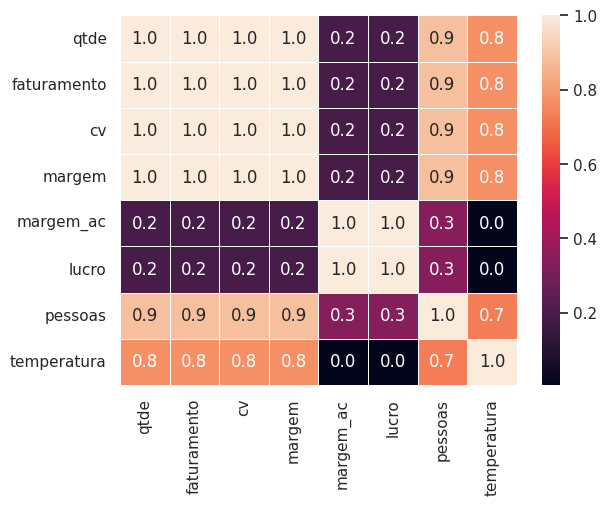

In [90]:
#plotando da matriz de correlação
plot = sn.heatmap(corr, annot = True, fmt=".1f", linewidths=.6)
plot

In [91]:
fat = df.groupby(['faixas_fat'])['faixas_fat'].count().reset_index(name='Frequência')
display(fat)

,faixas_fat,Frequência
0,101 a 200,4
1,201 a 300,8
2,301 a 400,10
3,401 a 500,6
4,501 a 600,3


<Axes: ylabel='faixas_fat'>

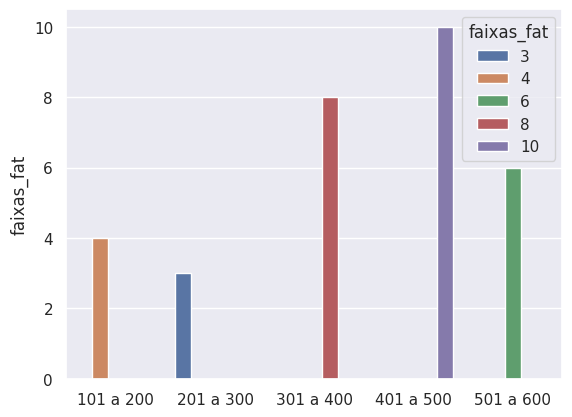

In [92]:
# Analisando a faixa de faturamento com mais frequência de pedidos.
sn.set(style="darkgrid")
faixa_fat = df['faixas_fat'].unique()
cont = df['faixas_fat'].value_counts()
sn.barplot(x=faixa_fat,y=cont,hue=cont)

In [93]:
area = df.groupby(['area'])['area'].count().reset_index(name='Frequência')
display(area)

,area,Frequência
0,Balcão,12
1,Externa,5
2,Mesa,14


<Axes: ylabel='Setor'>

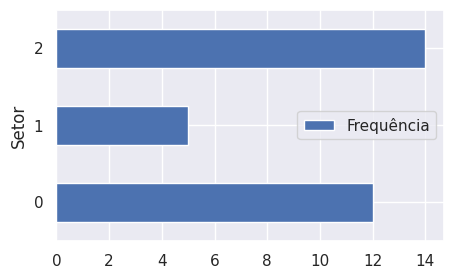

In [94]:
# Frequência de pedidos por setor
area.plot(kind ='barh', figsize=(5,3), ylabel='Setor')

<Axes: xlabel='margem', ylabel='Count'>

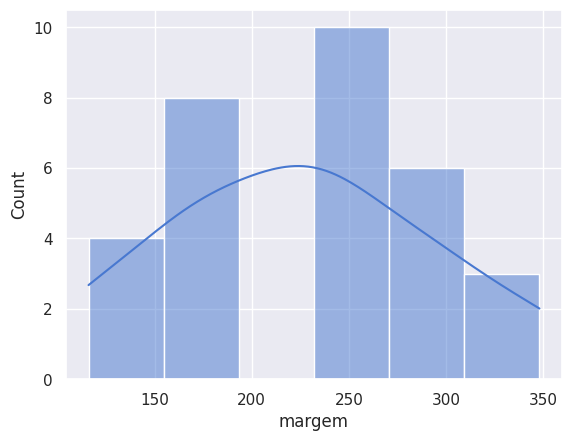

In [99]:
#Analisando a distribuição de margem de lucro
sn.histplot(data=df, x="margem", kde=True)

<Axes: xlabel='pessoas', ylabel='faturamento'>

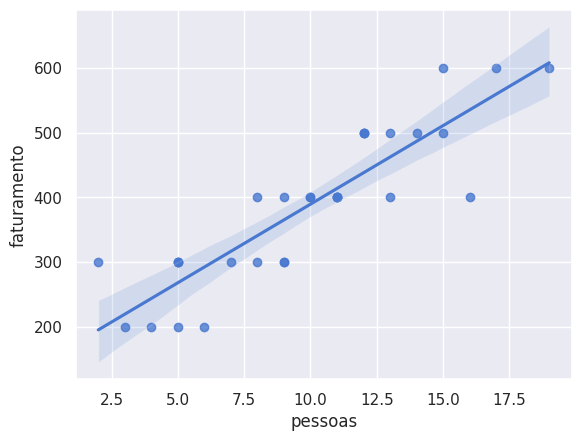

In [102]:
# Gráfico de dispersão com linha de regressão
# Análise faturamento por numero de cliente
sn.regplot(x="pessoas", y="faturamento", data=df)